### MNist Deep Dive Using a CNN

##### By Daniyal Mufti

In [1]:
#import relevant libraries
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
#Let's fetch the data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

In [3]:
#Let's split the data into Train, Valid and Test sets

X_train, X_valid, X_test, y_train, y_valid, y_test = X[:55000], X[55000:60000], X[60000:], y[:55000], y[55000:60000], y[60000:]

In [4]:
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

from scipy.ndimage.interpolation import shift

# A helper function to shift our MNist dataset instance
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

# Let's create our augemented Training dataset

X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
print(X_train_expanded.shape, y_train_expanded.shape)

y_train = y_train_expanded
X_train = X_train_expanded.reshape(275000, 28, 28)
X_valid = X_valid.reshape(5000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

(55000, 784) (5000, 784) (10000, 784) (55000,) (5000,) (10000,)
(275000, 784) (275000,)
(275000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1) (275000,) (5000,) (10000,)


##### Run the Model

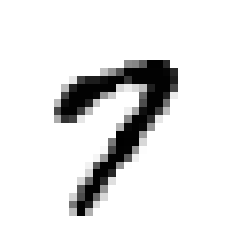

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit_test = X_train[15]
plt.imshow(some_digit_test, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
print("Tensorflow version {}".format(tf.__version__))
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))



Tensorflow version 2.5.0
Epoch 1/10
1047/8594 [==>...........................] - ETA: 1:09 - loss: 0.2951 - accuracy: 0.9097

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
model.evaluate(X_test, y_test)

### By using data augementation and Convolutional Neural Network get state of the art performance on the MNist dataset with a accuracy on the test set of 99.5%! 